In [ ]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
score_file_path = os.path.join("/datadisk/shuo/CodeReview/CodeReviewer/test_result/test_result_14_classes", "confidence_scores.json")
with open(score_file_path, 'r') as f:
    confidence_scores = json.load(f)
hit_scores = confidence_scores["hit"]
miss_scores = confidence_scores["miss"]

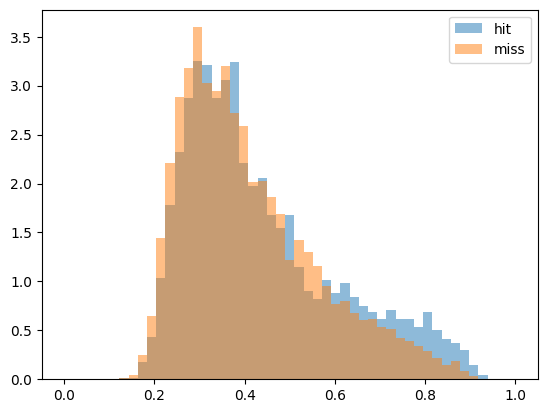

In [ ]:
bins = np.linspace(0, 1, 50)
plt.hist(hit_scores, bins, density=True, alpha=0.5, label='hit')
plt.hist(miss_scores, bins, density=True, alpha=0.5, label='miss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
result_by_conf_score_path = os.path.join("test_result_14_classes_test", "test_result_by_threshold.json")
with open(result_by_conf_score_path, 'r') as f:
    all_results = json.load(f)

thresholds = []
non_others_top1_precisions = []
coverages = []
for thred, result_dict in all_results.items():
    thresholds.append(float(thred))
    non_others_top1_precisions.append(result_dict['non_others_top1_precision'])
    coverages.append(result_dict['coverage'])

In [ ]:
print(thresholds)
print(coverages)
print(non_others_top1_precisions)

[0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
[0.747762808535746, 0.6924968040121939, 0.5969121840888977, 0.49739404071196774, 0.39561412134919854, 0.31881207591700267, 0.24987707739207396, 0.19284098731438687, 0.14731045333857803, 0.10876192349296883, 0.07670370734585505, 0.049562395515783265, 0.027633002261775987, 0.011308879929196578, 0.001475071295112597, 0.0]
[0.24355602314571279, 0.2529111047997728, 0.26787479406919273, 0.28509292210359827, 0.3062391250310713, 0.3297347316471314, 0.35104289649744197, 0.3839877613462519, 0.4145527369826435, 0.43670886075949367, 0.4666666666666667, 0.5119047619047619, 0.5658362989323843, 0.5652173913043478, 0.7333333333333333, nan]


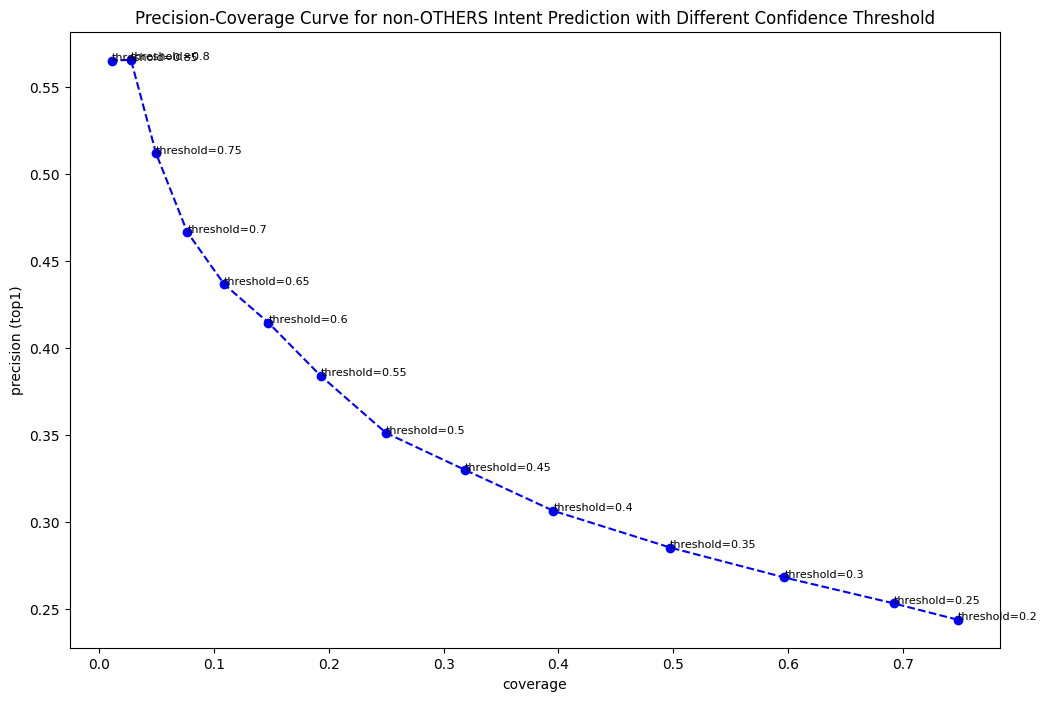

In [ ]:
data_labels = ["threshold="+str(t) for t in thresholds]
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(coverages[:-2], non_others_top1_precisions[:-2], 'bo--')
plt.xlabel("coverage")
plt.ylabel("precision (top1)")
plt.title("Precision-Coverage Curve for non-OTHERS Intent Prediction with Different Confidence Threshold")
for i in range(len(coverages[:-2])):
    ax.text(coverages[i], non_others_top1_precisions[i], data_labels[i], size=8)
plt.show()

In [ ]:
test_result_path = os.path.join("test_result_14_classes_test", "test_result.json")
with open(test_result_path, 'r') as f:
    result = json.load(f)

intent_classes = []
precisions = []
recalls = []
for key, value in result.items():
    if key[0].isupper():
        intent_classes.append(key)
        precisions.append(value['precision'])
        recalls.append(value['recall'])

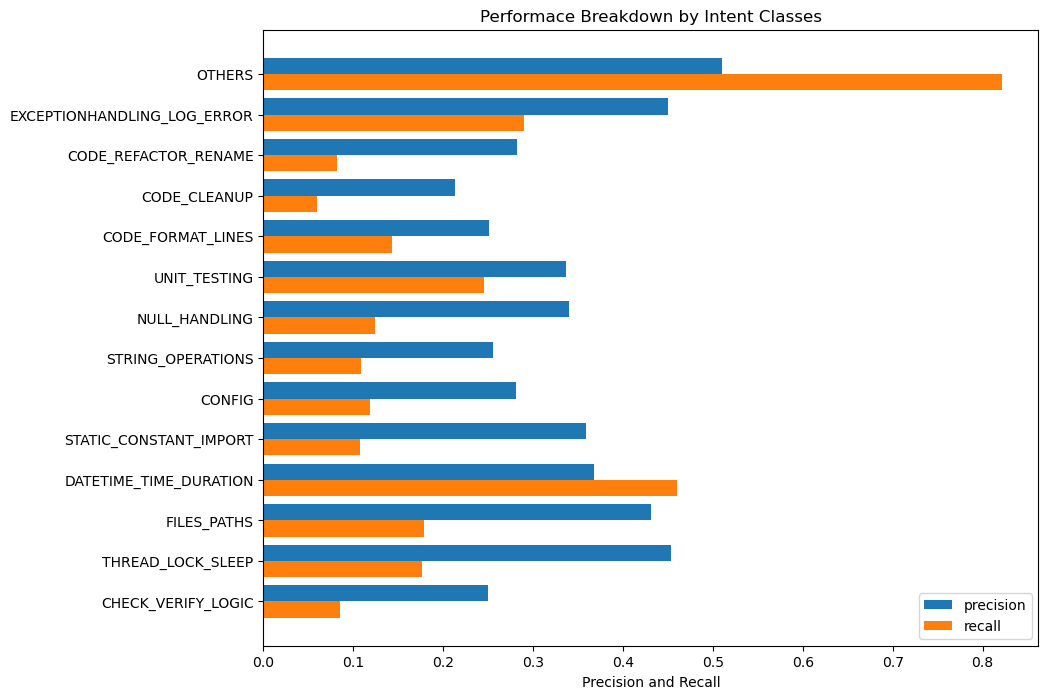

In [ ]:
intent_classes.reverse()
precisions.reverse()
recalls.reverse()

fig, ax = plt.subplots(figsize=(10,8))
X_axis = np.arange(len(intent_classes))
plt.barh(X_axis + 0.2, precisions, 0.4, label = 'precision')
plt.barh(X_axis - 0.2, recalls, 0.4, label = 'recall')
  
plt.yticks(X_axis, intent_classes)
plt.xlabel("Precision and Recall")
plt.title("Performace Breakdown by Intent Classes")
plt.legend()
plt.show()

In [ ]:
import json
from sklearn.metrics import classification_report

In [ ]:
gold, pred = [], []
with open(os.path.join("test_result_14_classes_test", "msg-test-pred.jsonl")) as f:
    for line in f:
        dp_dict = json.loads(line)
        gold.append(dp_dict['cmt_label'])
        pred.append(dp_dict['predicted_cmt_label'])

In [ ]:
print(classification_report(gold, pred, digits=4))

                             precision    recall  f1-score   support

         CHECK_VERIFY_LOGIC     0.1787    0.3136    0.2277       118
               CODE_CLEANUP     0.1797    0.1408    0.1579       554
          CODE_FORMAT_LINES     0.1899    0.2602    0.2196       392
       CODE_REFACTOR_RENAME     0.2075    0.2550    0.2288       843
                     CONFIG     0.1925    0.2803    0.2282       346
     DATETIME_TIME_DURATION     0.2778    0.5882    0.3774       187
EXCEPTIONHANDLING_LOG_ERROR     0.3027    0.4875    0.3735      1241
                FILES_PATHS     0.2681    0.3217    0.2925       230
              NULL_HANDLING     0.2439    0.2422    0.2431       289
                     OTHERS     0.5924    0.3173    0.4133      4617
     STATIC_CONSTANT_IMPORT     0.2373    0.3485    0.2823       307
          STRING_OPERATIONS     0.2416    0.2387    0.2401       331
          THREAD_LOCK_SLEEP     0.2031    0.4024    0.2699       164
               UNIT_TESTING     0